In [1]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
data=pd.read_csv(url)

In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

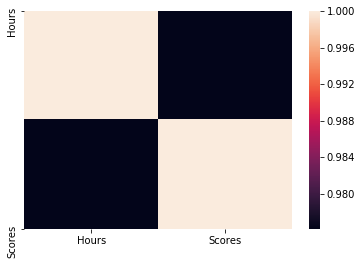

In [7]:
sns.heatmap(data.corr())

Text(0, 0.5, 'percentage score')

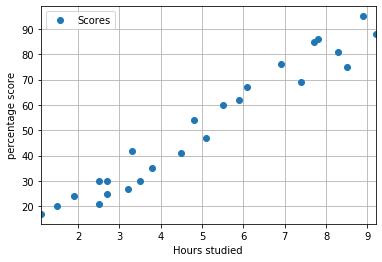

In [8]:
data.plot(x='Hours',y='Scores',style='o',grid='bool')
plt.xlabel('Hours studied')
plt.ylabel('percentage score')


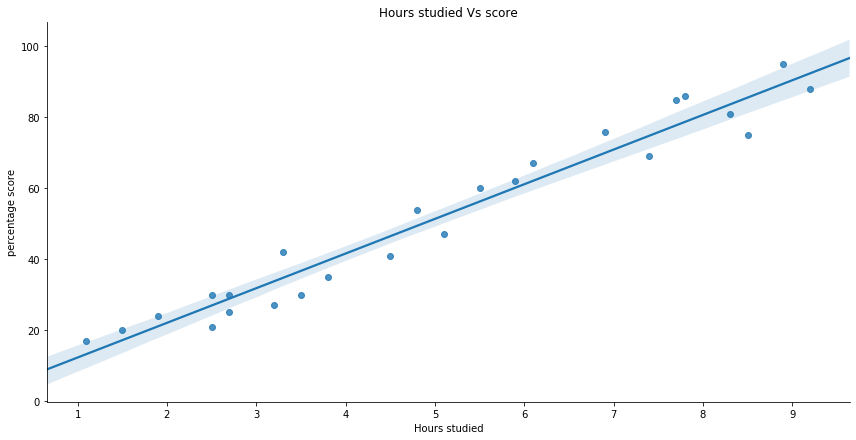

In [16]:

sns.lmplot(x='Hours',y='Scores',data=data,aspect=2,height=6)
plt.xlabel('Hours studied')
plt.ylabel('percentage score')
plt.title('Hours studied Vs score');

In [25]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values


In [10]:
from sklearn.model_selection import  train_test_split

In [27]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:

from sklearn.linear_model import LinearRegression  
regress = LinearRegression()  
regress.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

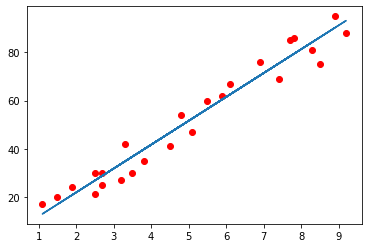

(array([9.91065648]), 2.018160041434683)

In [29]:

# Plotting the Linear regression line
line = regress.coef_ * X + regress.intercept_

# Plotting for the test data
plt.scatter(X, y,color ='r')
plt.plot(X, line);
plt.show()
regress.coef_,regress.intercept_

In [30]:
# predicting the given data
y_pred = regress.predict(X_test)

In [33]:
# predicting for given input of Hours(9.25) as per the given input for internship task 2 
Hours_new = np.array([9.25])
Hours_new = Hours_new.reshape(-1,1)
Scores_predict = regress.predict(Hours_new)
print("Hours studied : {}".format(Hours_new))
print("Percentage scored : {} ".format(Scores_predict))

Hours studied : [[9.25]]
Percentage scored : [93.69173249] 


In [34]:

# comparing actual and predicted value 
x = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
x

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


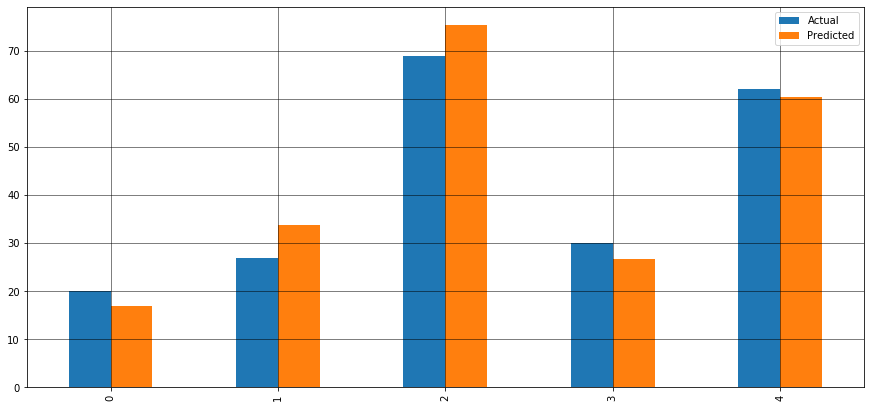

In [35]:

# We can also visualize comparison result as a bar graph
ds1 = x.head()
ds1.plot(kind='bar',figsize=(15,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [36]:
# Evaluating the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
